In [33]:
import pandas as pd
df = pd.read_csv("accelerometer_gyro_mobile_phone_dataset.csv")
df.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [34]:
df.isnull().sum()

accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64

In [35]:
df.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [36]:
df.shape

(31991, 8)

In [37]:

print(df.dtypes)

accX         float64
accY         float64
accZ         float64
gyroX        float64
gyroY        float64
gyroZ        float64
timestamp     object
Activity       int64
dtype: object


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# for i in df.columns:
#   df[i]=le.fit_transform(df[i])
# df.dtypes
df['timestamp']=le.fit_transform(df['timestamp'])
df.dtypes

accX         float64
accY         float64
accZ         float64
gyroX        float64
gyroY        float64
gyroZ        float64
timestamp      int32
Activity       int64
dtype: object

In [39]:
df.corr()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
accX,1.000000,-0.194325,0.018496,-0.031462,-0.027962,-0.047648,0.135595,0.126771
accY,-0.194325,1.000000,-0.079527,-0.004358,-0.008545,-0.004644,-0.116643,0.113486
accZ,0.018496,-0.079527,1.000000,-0.033973,-0.022959,0.014923,0.009796,-0.014448
gyroX,-0.031462,-0.004358,-0.033973,1.000000,0.129692,0.146878,0.001195,0.001469
gyroY,-0.027962,-0.008545,-0.022959,0.129692,1.000000,0.051621,0.008092,-0.001606
gyroZ,-0.047648,-0.004644,0.014923,0.146878,0.051621,1.000000,0.019567,-0.009460
timestamp,0.135595,-0.116643,0.009796,0.001195,0.008092,0.019567,1.000000,0.175616
Activity,0.126771,0.113486,-0.014448,0.001469,-0.001606,-0.009460,0.175616,1.000000


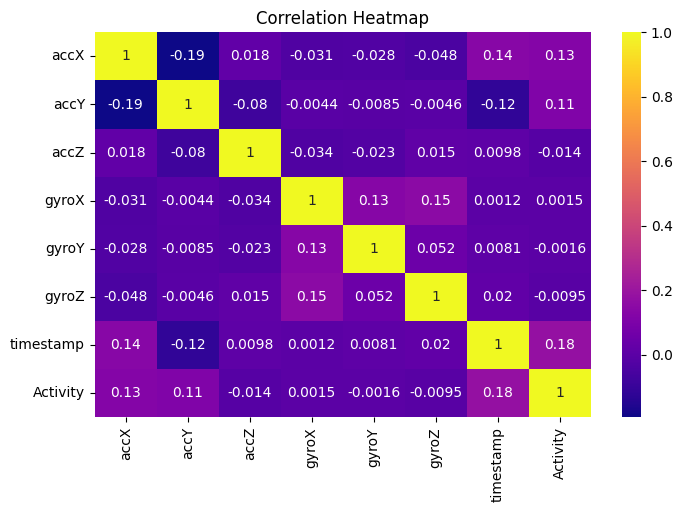

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# for i in df.columns:
#   if df[i].corr(df['Activity']) < 0.01:
#     df.drop(columns=[i],inplace=True)
# df

In [42]:
df['Activity'].unique()

array([1, 0], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='Activity',axis=1)
y=df['Activity']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_std, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(x_train_std, y_train)

y_pred = best_logistic_regression.predict(x_test_std)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9820795999166493


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
param_grid = {'n_neighbors': range(5, 10)}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(x_train_std, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(x_train_std, y_train)

y_pred = best_knn_classifier.predict(x_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'n_neighbors': 9}
Accuracy: 0.9823921650343822


In [48]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 8],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.9924984371744113


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2_Score:", r2)


R2_Score: 0.06947202057635404
